In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#source: https://www.kaggle.com/datasets/slmsshk/medical-students-dataset

medical_students_raw = pd.read_csv('medical_students_dataset.csv')

print(medical_students_raw.info())
print(medical_students_raw.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
7644


In [3]:
"'The dataset has 200,000 entries and 20000 missing values. This represents 10% of the date'"
"'Amongst the 200,000 entries, 7644 of them appear to be duplicates.'"

"'Amongst the 200,000 entries, 7644 of them appear to be duplicates.'"

In [52]:
print(medical_students_raw[medical_students_raw.duplicated(keep='first')])
print(medical_students_raw[100007:100009])

        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
100007         8.0  28.0    Male  186.489402  52.389752         AB  15.063921   
100011        12.0  34.0  Female  182.416302  76.371050         AB  22.950992   
100018        19.0  31.0  Female  158.790160  46.829849         AB  18.572723   
100022        23.0  29.0  Female  179.909041  90.679436         AB  28.015787   
100023        24.0  18.0    Male         NaN  52.521560         AB  13.570402   
...            ...   ...     ...         ...        ...        ...        ...   
199961     99962.0  31.0    Male  180.859321  43.647709          B  13.343804   
199962     99963.0  18.0  Female  180.133710  48.381499          A  14.910401   
199965     99966.0  22.0  Female  166.562901  48.684146         AB  17.548137   
199973     99974.0  25.0  Female  156.297842  90.690186          B  37.123963   
199985     99986.0  23.0  Female  162.884951  82.485778          B  31.089745   

        Temperature  Heart 

In [53]:
row_to_find_duplicates = medical_students_raw.iloc[7]

# Find rows that are duplicates of the chosen row
duplicates = medical_students_raw[medical_students_raw.apply(lambda x: x.equals(row_to_find_duplicates), axis=1)]
print("Row to Find Duplicates Of:")
print(row_to_find_duplicates)

print("\nDuplicate Rows:")
print(duplicates)

Row to Find Duplicates Of:
Student ID               8.0
Age                     28.0
Gender                  Male
Height            186.489402
Weight             52.389752
Blood Type                AB
BMI                15.063921
Temperature        98.227788
Heart Rate              85.0
Blood Pressure         123.0
Cholesterol            128.0
Diabetes                  No
Smoking                   No
Name: 7, dtype: object

Duplicate Rows:
        Student ID   Age Gender      Height     Weight Blood Type        BMI  \
7              8.0  28.0   Male  186.489402  52.389752         AB  15.063921   
100007         8.0  28.0   Male  186.489402  52.389752         AB  15.063921   

        Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
7         98.227788        85.0           123.0        128.0       No      No  
100007    98.227788        85.0           123.0        128.0       No      No  


In [6]:
medical_students = medical_students_raw.drop_duplicates(keep='first', ignore_index=True)
print(medical_students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192356 entries, 0 to 192355
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      172465 non-null  float64
 1   Age             172464 non-null  float64
 2   Gender          172432 non-null  object 
 3   Height          172449 non-null  float64
 4   Weight          172455 non-null  float64
 5   Blood Type      172440 non-null  object 
 6   BMI             172456 non-null  float64
 7   Temperature     172445 non-null  float64
 8   Heart Rate      172453 non-null  float64
 9   Blood Pressure  172464 non-null  float64
 10  Cholesterol     172463 non-null  float64
 11  Diabetes        172451 non-null  object 
 12  Smoking         172459 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.1+ MB
None


In [54]:
print(medical_students.describe(include='all'))

           Student ID            Age  Gender         Height         Weight  \
count   171172.000000  190904.000000  190904  190904.000000  190904.000000   
unique            NaN            NaN       3            NaN            NaN   
top               NaN            NaN  Female            NaN            NaN   
freq              NaN            NaN   85602            NaN            NaN   
mean     49983.269571      26.021131     NaN     174.988164     650.810093   
std      28882.720283       4.630631     NaN      14.293183    1985.052562   
min          1.000000      18.000000     NaN     150.000041      40.000578   
25%      24979.000000      22.000000     NaN     162.769223      56.657683   
50%      49946.000000      26.000000     NaN     174.943405      72.664369   
75%      75010.250000      30.000000     NaN     187.253138      88.861677   
max     100000.000000      34.000000     NaN     199.998639    9999.990661   

       Blood Type            BMI    Temperature     Heart Rate 

In [55]:
print(medical_students['Gender'].value_counts(dropna=False))
print(medical_students['Blood Type'].value_counts(dropna=False))
print(medical_students['Diabetes'].value_counts(dropna=False))
print(medical_students['Smoking'].value_counts(dropna=False))

Female    85602
Male      85525
ND        19777
Name: Gender, dtype: int64
O     43307
B     43245
AB    42327
A     42238
ND    19787
Name: Blood Type, dtype: int64
No     153986
ND      19753
Yes     17165
Name: Diabetes, dtype: int64
No     136861
Yes     34308
ND      19735
Name: Smoking, dtype: int64


In [56]:
gender_missing_weight = medical_students[(medical_students['Gender'].notna()) & (medical_students['Weight'].isna())]
print(gender_missing_weight)
print(gender_missing_weight['Gender'].value_counts())

Empty DataFrame
Columns: [Student ID, Age, Gender, Height, Weight, Blood Type, BMI, Temperature, Heart Rate, Blood Pressure, Cholesterol, Diabetes, Smoking, Cholesterol levels]
Index: []
Series([], Name: Gender, dtype: int64)


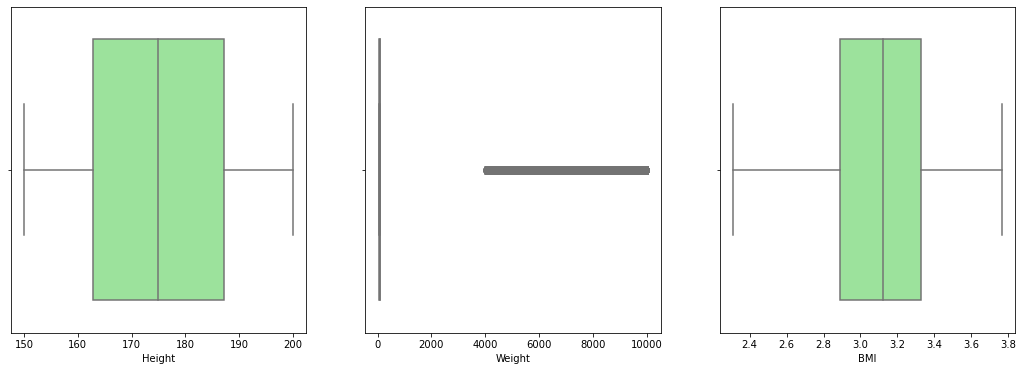

In [35]:
fix, ax = plt.subplots(1,3, figsize=(18,6))
ax1 = sns.boxplot(data=medical_students, x='Height', color='lightgreen', ax=ax[0])
ax2 = sns.boxplot(data=medical_students, x='Weight', color='lightgreen', ax=ax[1])
ax3 = sns.boxplot(data=medical_students, x='BMI', color='lightgreen', ax=ax[2])

#There seems to be an issue in the observations recorded for the variable 'Weight', which itself impacts the BMI

In [57]:
for index, row in medical_students.iterrows():
    if row['Weight'] > 4000:
        medical_students.loc[index, 'Weight'] = row['Weight']/100

In [63]:
print(medical_students['Weight'].max())

99.99990661273384


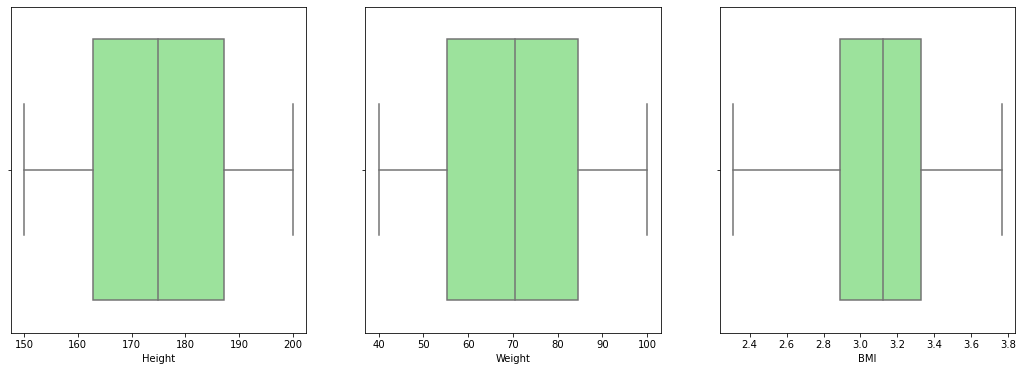

In [64]:
fix, ax = plt.subplots(1,3, figsize=(18,6))
ax1 = sns.boxplot(data=medical_students, x='Height', color='lightgreen', ax=ax[0])
ax2 = sns.boxplot(data=medical_students, x='Weight', color='lightgreen', ax=ax[1])
ax3 = sns.boxplot(data=medical_students, x='BMI', color='lightgreen', ax=ax[2])

In [68]:
#Weight can be calculated from the Height and BMI columns
print(medical_students['Weight'].max())
for index, row in medical_students.iterrows():
    if np.isnan(row['Weight']):
        medical_students.at[index, 'Weight'] = row['BMI']*(row['Height']**2 / 100)
        
print(medical_students['Weight'].isna().value_counts())


99.99990661273384
False    190904
Name: Weight, dtype: int64


In [69]:
#Height can be calculated from the Weight and BMI columns

for index, row in medical_students.iterrows():
    if np.isnan(row['Height']):
        medical_students.at[index, 'Height'] = np.sqrt(row['Weight']/row['BMI'])*100                           

print(medical_students['Height'].isna().value_counts())

False    190904
Name: Height, dtype: int64


In [70]:
#BMI can be calculated from the Weight and Height columns

for index, row in medical_students.iterrows():
    if np.isnan(row['BMI']):
        medical_students.at[index, 'BMI'] = row['Weight']/ ((row['Height']/100)**2)
        
print(medical_students['BMI'].isna().value_counts())

False    190904
Name: BMI, dtype: int64


                 BMI
count  190904.000000
mean        3.103386
std         0.303939
min         2.310041
25%         2.887497
50%         3.120710
75%         3.325773
max         3.765428
3.7654277720228126


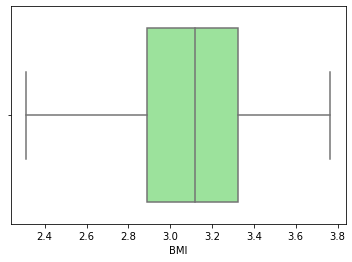

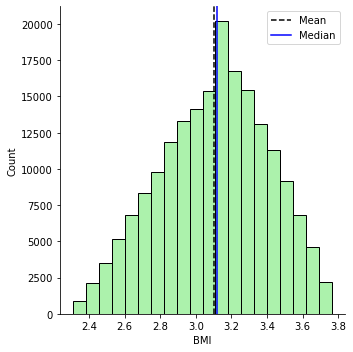

In [71]:
print(medical_students[['BMI']].describe())
sns.boxplot(data=medical_students, x='BMI', color='lightgreen')
sns.displot(medical_students['BMI'], bins=20, color='lightgreen')
plt.axvline(x=np.mean(medical_students['BMI']), color='black', linestyle='--', label='Mean')
plt.axvline(x=np.median(medical_students['BMI'].dropna()), color='blue', label='Median')
plt.legend()
print(medical_students['BMI'].max())

43.183678929143376


<AxesSubplot:xlabel='BMI'>

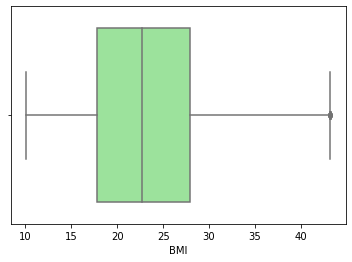

In [18]:
Q1_BMI = medical_students['BMI'].quantile(0.25)
Q3_BMI = medical_students['BMI'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI
outliers_low_BMI = Q1_BMI - 1.5*IQR_BMI
outliers_high_BMI = Q3_BMI + 1.5*IQR_BMI

print(outliers_high_BMI)

BMI_upper_outliers = medical_students['BMI'] > outliers_high_BMI
medical_students = medical_students[~BMI_upper_outliers]
sns.boxplot(data=medical_students, x='BMI', color='lightgreen')

#Outliers have been removed

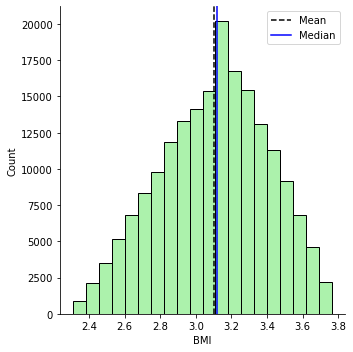

In [72]:
sns.displot(medical_students['BMI'], bins=20, color='lightgreen')
plt.axvline(x=np.mean(medical_students['BMI']), color='black', linestyle='--', label='Mean')
plt.axvline(x=np.median(medical_students['BMI'].dropna()), color='blue', label='Median')
plt.legend()

In [80]:
#Converting Temperature observation from Fahrenheit to Celsius
#for index, row in medical_students.iterrows():
 #   medical_students.at[index, 'Temperature'] = (row['Temperature']-32)*5/9

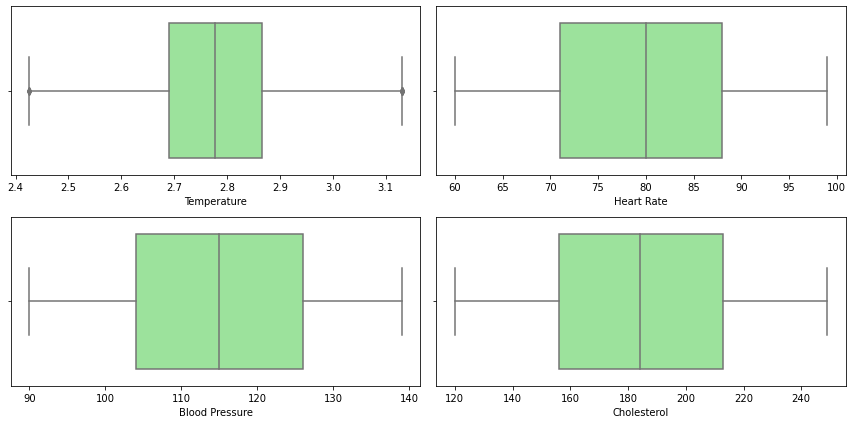

In [81]:
fix, ax = plt.subplots(2,2, figsize=(12,6))
ax1 = sns.boxplot(data=medical_students, x='Temperature', color='lightgreen', ax=ax[0,0])
ax2 = sns.boxplot(data=medical_students, x='Heart Rate', color='lightgreen', ax=ax[0,1])
ax3 = sns.boxplot(data=medical_students, x='Blood Pressure', color='lightgreen', ax=ax[1,0])
ax4 = sns.boxplot(data=medical_students, x='Cholesterol', color='lightgreen', ax=ax[1,1])

plt.tight_layout()

In [79]:
print(medical_students['Temperature'].max())
print(medical_students['Temperature'].min())

3.1306113323014038
2.4260017870341914


188379
68


<AxesSubplot:xlabel='Temperature'>

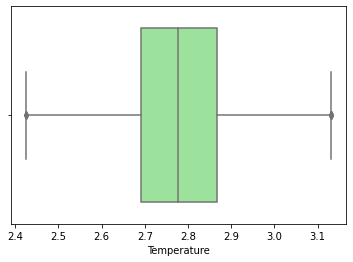

In [78]:
Q1_temp = medical_students['Temperature'].quantile(0.25)
Q3_temp = medical_students['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
outliers_low_temp = Q1_temp - 1.5*IQR_temp
outliers_high_temp = Q3_temp + 1.5*IQR_temp

print(len(medical_students))
print(len(medical_students[(medical_students['Temperature'] < outliers_low_temp) | (medical_students['Temperature'] > outliers_high_temp)]))

temp_upper_outliers = medical_students['Temperature'] > outliers_high_temp
temp_lower_outliers = medical_students['Temperature'] < outliers_low_temp
medical_students = medical_students[~ (temp_upper_outliers| temp_lower_outliers)]
sns.boxplot(data=medical_students, x='Temperature', color='lightgreen')

#Outliers have been removed

In [24]:
print(len(medical_students))

190904


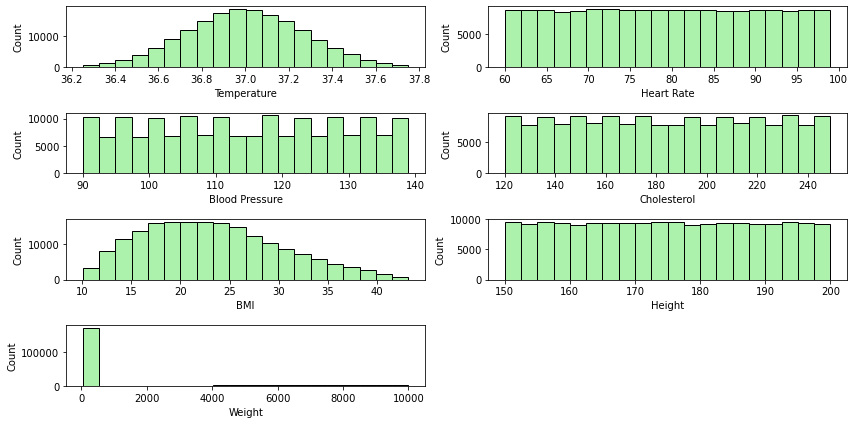

In [25]:
fig, ax = plt.subplots(4,2, figsize=(12,6))
ax1 = sns.histplot(medical_students['Temperature'], bins=20, color='lightgreen', ax=ax[0,0])
ax2 = sns.histplot(medical_students['Heart Rate'], bins=20, color='lightgreen', ax=ax[0,1])
ax3 = sns.histplot(medical_students['Blood Pressure'], bins=20, color='lightgreen', ax=ax[1,0])
ax4 = sns.histplot(medical_students['Cholesterol'], bins=20, color='lightgreen', ax=ax[1,1])
ax5 = sns.histplot(medical_students['BMI'], bins=20, color='lightgreen', ax=ax[2, 0])
ax6 = sns.histplot(medical_students['Height'], bins=20, color='lightgreen', ax=ax[2, 1])
ax7 = sns.histplot(medical_students['Weight'], bins=20, color='lightgreen', ax=ax[3, 0])


fig.delaxes(ax[3, 1])
plt.tight_layout()
plt.show()

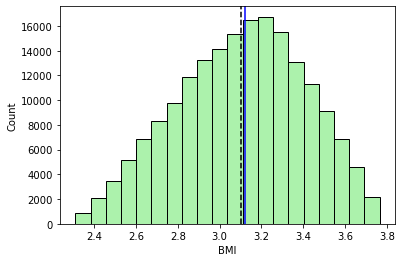

In [26]:
medical_students['BMI'] = np.log(medical_students['BMI'])

sns.histplot(medical_students['BMI'], bins=20, color='lightgreen')
plt.axvline(x=np.mean(medical_students['BMI']), color='black', linestyle='--', label='Mean')
plt.axvline(x=np.median(medical_students['BMI'].dropna()), color='blue', linestyle='-', label='Median')

In [27]:
#Filling missing values that could not be calculated with the other variables
medical_students['Age'] = medical_students['Age'].fillna(medical_students['Age'].median())
medical_students['Height'] = medical_students['Height'].fillna(medical_students['Height'].median())
medical_students['Weight'] = medical_students['Weight'].fillna(medical_students['Weight'].median())
medical_students['BMI'] = medical_students['BMI'].fillna(medical_students['BMI'].median())
medical_students['Temperature'] = medical_students['Temperature'].fillna(medical_students['Temperature'].median())
medical_students['Heart Rate'] = medical_students['Heart Rate'].fillna(medical_students['Heart Rate'].median())
medical_students['Cholesterol'] = medical_students['Cholesterol'].fillna(medical_students['Cholesterol'].median())
medical_students['Blood Pressure'] = medical_students['Blood Pressure'].fillna(medical_students['Blood Pressure'].median())

In [28]:
for index, row in medical_students.iterrows():
    if pd.isna(row['Blood Type']):
        medical_students.at[index, 'Blood Type'] = 'ND'

for index, row in medical_students.iterrows():
    if pd.isna(row['Gender']):
        medical_students.at[index, 'Gender'] = 'ND'
        
for index, row in medical_students.iterrows():
    if pd.isna(row['Diabetes']):
        medical_students.at[index, 'Diabetes'] = 'ND'

for index, row in medical_students.iterrows():
    if pd.isna(row['Smoking']):
        medical_students.at[index, 'Smoking'] = 'ND'

In [44]:
print(medical_students.columns)
print(medical_students.isnull().sum())

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking', 'Cholesterol levels'],
      dtype='object')
Student ID            19732
Age                       0
Gender                    0
Height                    0
Weight                    0
Blood Type                0
BMI                       0
Temperature               0
Heart Rate                0
Blood Pressure            0
Cholesterol               0
Diabetes                  0
Smoking                   0
Cholesterol levels        0
dtype: int64


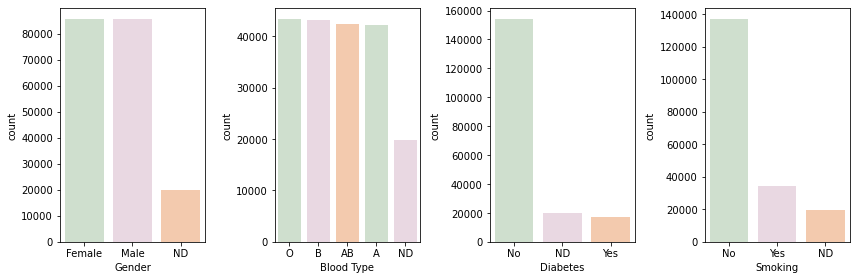

In [30]:
pastel_palette = ['#CCE2CB', '#ECD5E3', '#FFC8A2']
students_data = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

fig, ax = plt.subplots(1, len(students_data), figsize=(12, 4))
for i, column in enumerate(students_data):
    count_data = medical_students[column].value_counts().sort_values(ascending=False)
    sns.countplot(data=medical_students, x=column, order=count_data.index, palette=pastel_palette, ax=ax[i])
    
plt.tight_layout()

In [31]:
for index, row in medical_students.iterrows():
    chol = row['Cholesterol']
    if pd.isna(chol):
        medical_students.at[index, 'Cholesterol levels'] = 'Other'
    elif chol < 200:
        medical_students.at[index, 'Cholesterol levels'] = 'Low'
    elif 200 <= chol < 240:
        medical_students.at[index, 'Cholesterol levels'] = 'Borderline to moderately elevated'
    else:
        medical_students.at[index, 'Cholesterol levels'] = 'High'

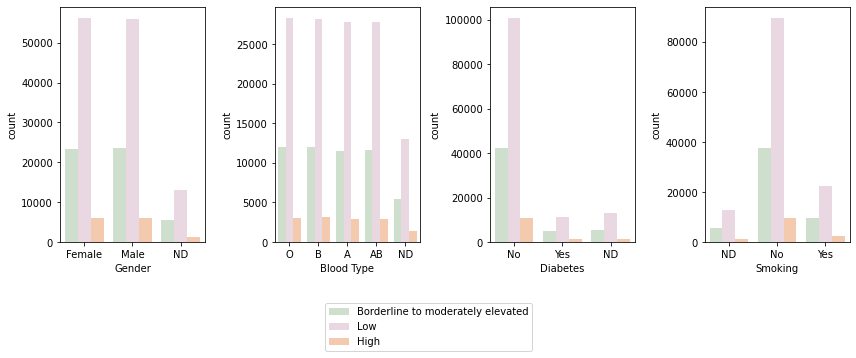

In [32]:
fig, ax = plt.subplots(1, len(students_data), figsize=(12, 4))
for i, column in enumerate(students_data):
    sns.countplot(data=medical_students, x=column, hue='Cholesterol levels', palette=pastel_palette, ax=ax[i])
    ax[i].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25))

plt.tight_layout()

In [33]:
print(medical_students['Cholesterol levels'].value_counts())

Low                                  125044
Borderline to moderately elevated     52569
High                                  13291
Name: Cholesterol levels, dtype: int64


In [49]:
print(medical_students.info)


<bound method DataFrame.info of         Student ID   Age  Gender      Height     Weight Blood Type       BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  3.319475   
1              2.0  26.0    Male  152.069157  47.630941          B  3.025152   
2              3.0  32.0  Female  182.537664  55.741083          A  2.817145   
3              NaN  30.0    Male  182.112867  63.332207          B  2.949481   
4              5.0  23.0  Female  174.943405  46.234173          O  3.120710   
...            ...   ...     ...         ...        ...        ...       ...   
192351         NaN  24.0    Male  176.503260  95.756997          B  3.425475   
192352     99997.0  29.0  Female  163.917675  45.225194         ND  2.823266   
192353     99998.0  34.0  Female  173.275523  99.648914         ND  3.502228   
192354     99999.0  30.0  Female  156.446944  50.142824          A  3.019782   
192355    100000.0  20.0  Female  153.927409  99.928405          O  3.741832   

       

In [50]:
medical_students.to_csv('medical_students_dataset_cleaned.csv', index=False, encoding='utf-8')